**Importing Libraries**

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from time import time
from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,f1_score, precision_score, recall_score, confusion_matrix, accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb

sns.set_theme()

**Importing Dataset**

In [111]:
data = pd.read_csv("dataset/OnlineNewsPopularity.csv")
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# **Exploring Dataset**

1.Count of Null values

2.Shape of dataset

3.Uniques values

4.Drop Duplicates

1. Count of Null values

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [113]:
has_nan = data.isna().any().any()
if has_nan:
    print("The DataFrame contains NaN values.")
else:
    print("The DataFrame does not contain any NaN values.")

The DataFrame does not contain any NaN values.


2. Shape of the Dataset

In [114]:
data.shape

(39644, 61)

3. Uniques values

Verifying whether there are columns containing only one unique value, as they will have no impact on our analysis.

In [115]:
data.nunique(dropna=True)

url                              39644
 timedelta                         724
 n_tokens_title                     20
 n_tokens_content                 2406
 n_unique_tokens                 27281
                                 ...  
 title_subjectivity                673
 title_sentiment_polarity          813
 abs_title_subjectivity            532
 abs_title_sentiment_polarity      653
 shares                           1454
Length: 61, dtype: int64

In [116]:
data.shape

(39644, 61)

4. Drop Duplicates

In [118]:
data=data.drop_duplicates()
data.shape

(39644, 61)

**Outcomes** 

1. There were no duplicates found

# **Statistics of Dataset**

## *Descriptive statistics*

Summarizing the distribution of the numerical variables.

In [9]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


# **Data Preprocessing (Preparing Dataset)**

## 1. Current Columns of Dataset

In [10]:
data.columns[:10]

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs'],
      dtype='object')

## 2. Replacement of Empty Spaces

In [11]:
data.rename(columns=lambda x: x.replace(' ', ''), inplace=True)
data.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

### 3. Remove :URL and timedelta columns as they are meta-data and should not be treated as features.

In [12]:
try:
    data.drop(labels=['url', 'timedelta'], axis = 1, inplace=True)
except:
    pass
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [13]:
num_of_nowords=data[data['n_tokens_title']==0].index
print('number of news Titles with no words',num_of_nowords.size)

number of news Titles with no words 0


## 4. Drop items with Number Of Words In The Content = 0

In [14]:
num_of_nowords=data[data['n_tokens_content']==0].index
print('number of news items with no words',num_of_nowords.size)

number of news items with no words 1181


In [15]:
data = data[data['n_tokens_content'] != 0]

Seperate bi and multi_variate columns

In [16]:
bi_value_cols = data.loc[:,data.nunique()==2].columns
multi_value_cols = data.drop(labels=bi_value_cols,axis=1).columns
print(bi_value_cols)
print(multi_value_cols)

Index(['data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend'],
      dtype='object')
Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'g

In [17]:
data_copy = data.copy()

# **Data Visualization** 

## *1. Using Countplot subplots*

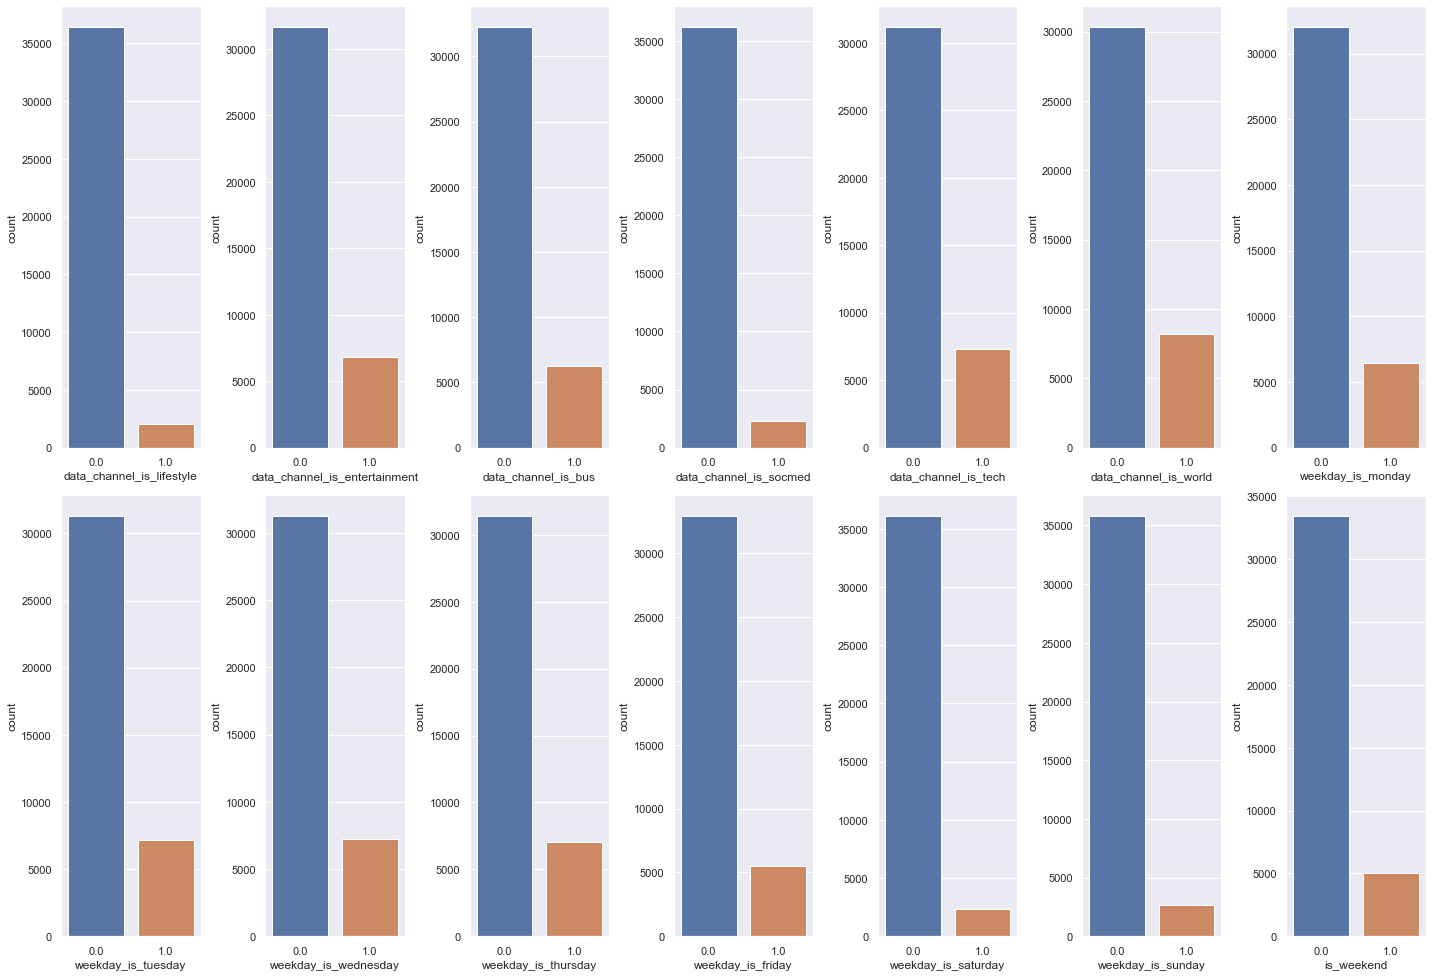

In [18]:
n=1
k=round(len(bi_value_cols)/7)+1

plt.figure(figsize=(20,20))
for i in bi_value_cols:
    plt.subplot(k,7,n)
    sns.countplot(x=i,data=data)
    n+=1

plt.tight_layout()
plt.show()

## 2. Boxplot

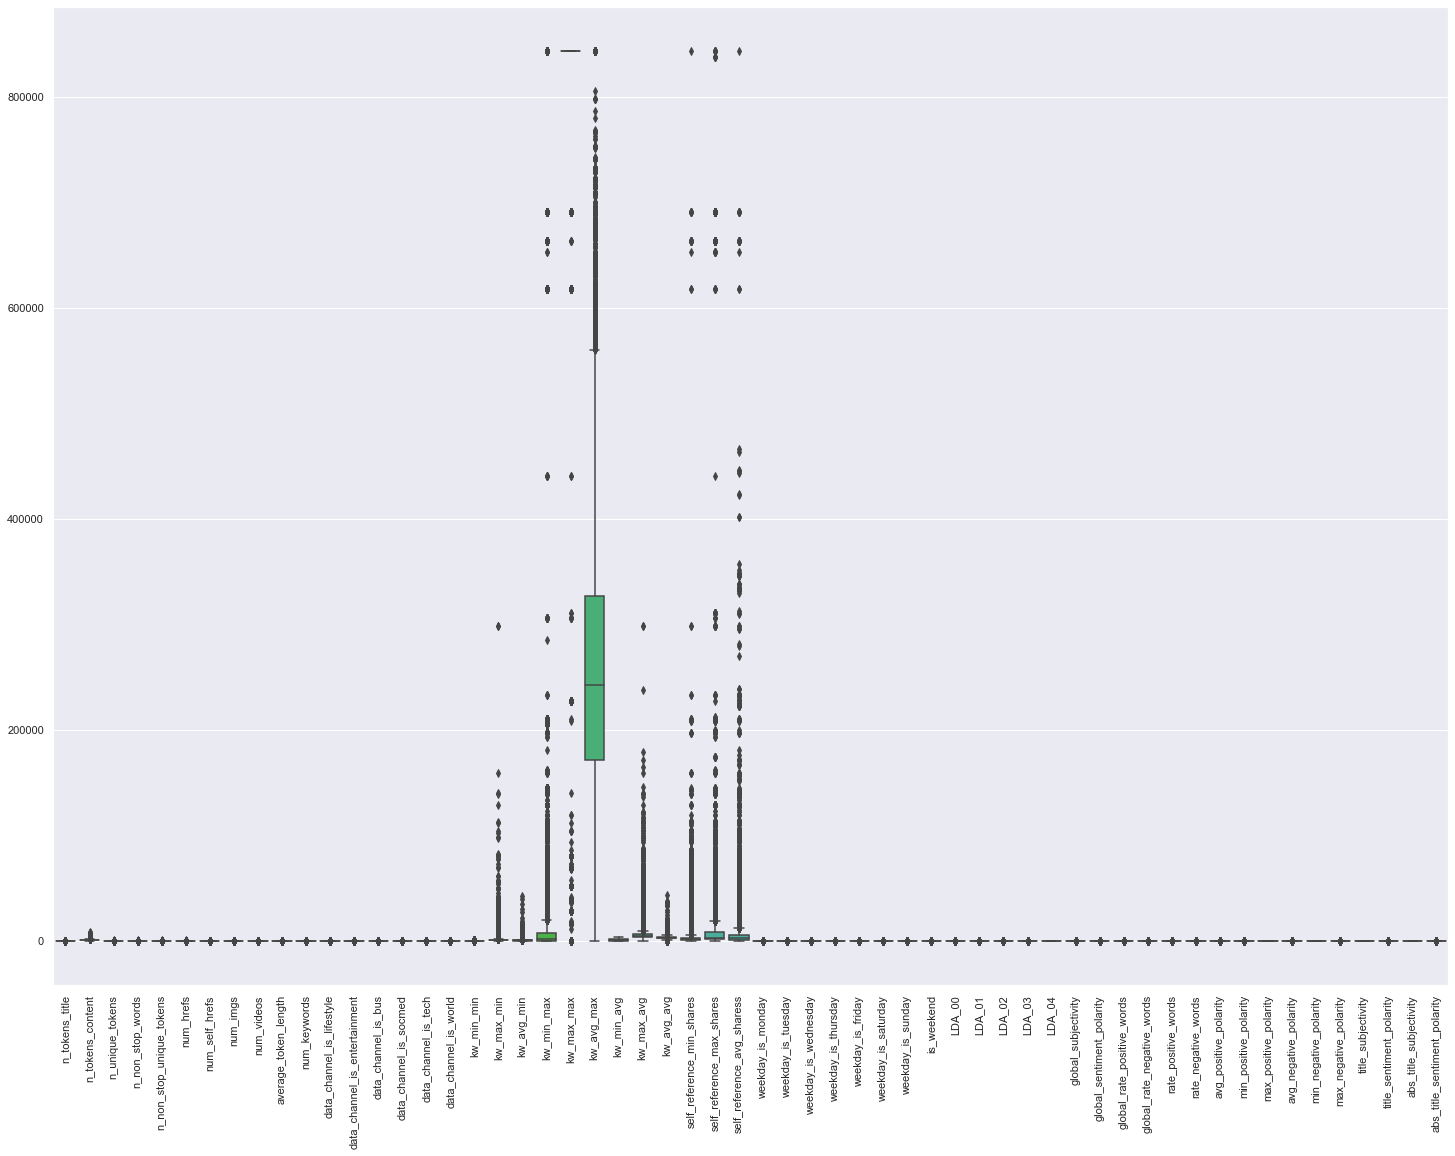

In [19]:
plt.figure(figsize=(25,18))
plt.xticks(rotation =90)
sns.boxplot(data = data.drop(labels=['shares'],axis = 1))
plt.show()

# 3. Scatterplot vs dependent variable

In [20]:
tmp_unique_multi = []
for i in multi_value_cols[:-1]:
    tmp_unique_multi.append(len(set(data[i])))
print(tmp_unique_multi)

[20, 2405, 27280, 1450, 22929, 133, 59, 91, 53, 30135, 10, 26, 1068, 16471, 1004, 34, 29972, 15649, 18991, 38131, 1255, 1137, 8626, 38165, 37936, 38348, 37803, 38194, 34501, 34695, 13159, 10271, 2284, 2284, 27301, 33, 38, 13841, 54, 49, 657, 791, 520, 634]


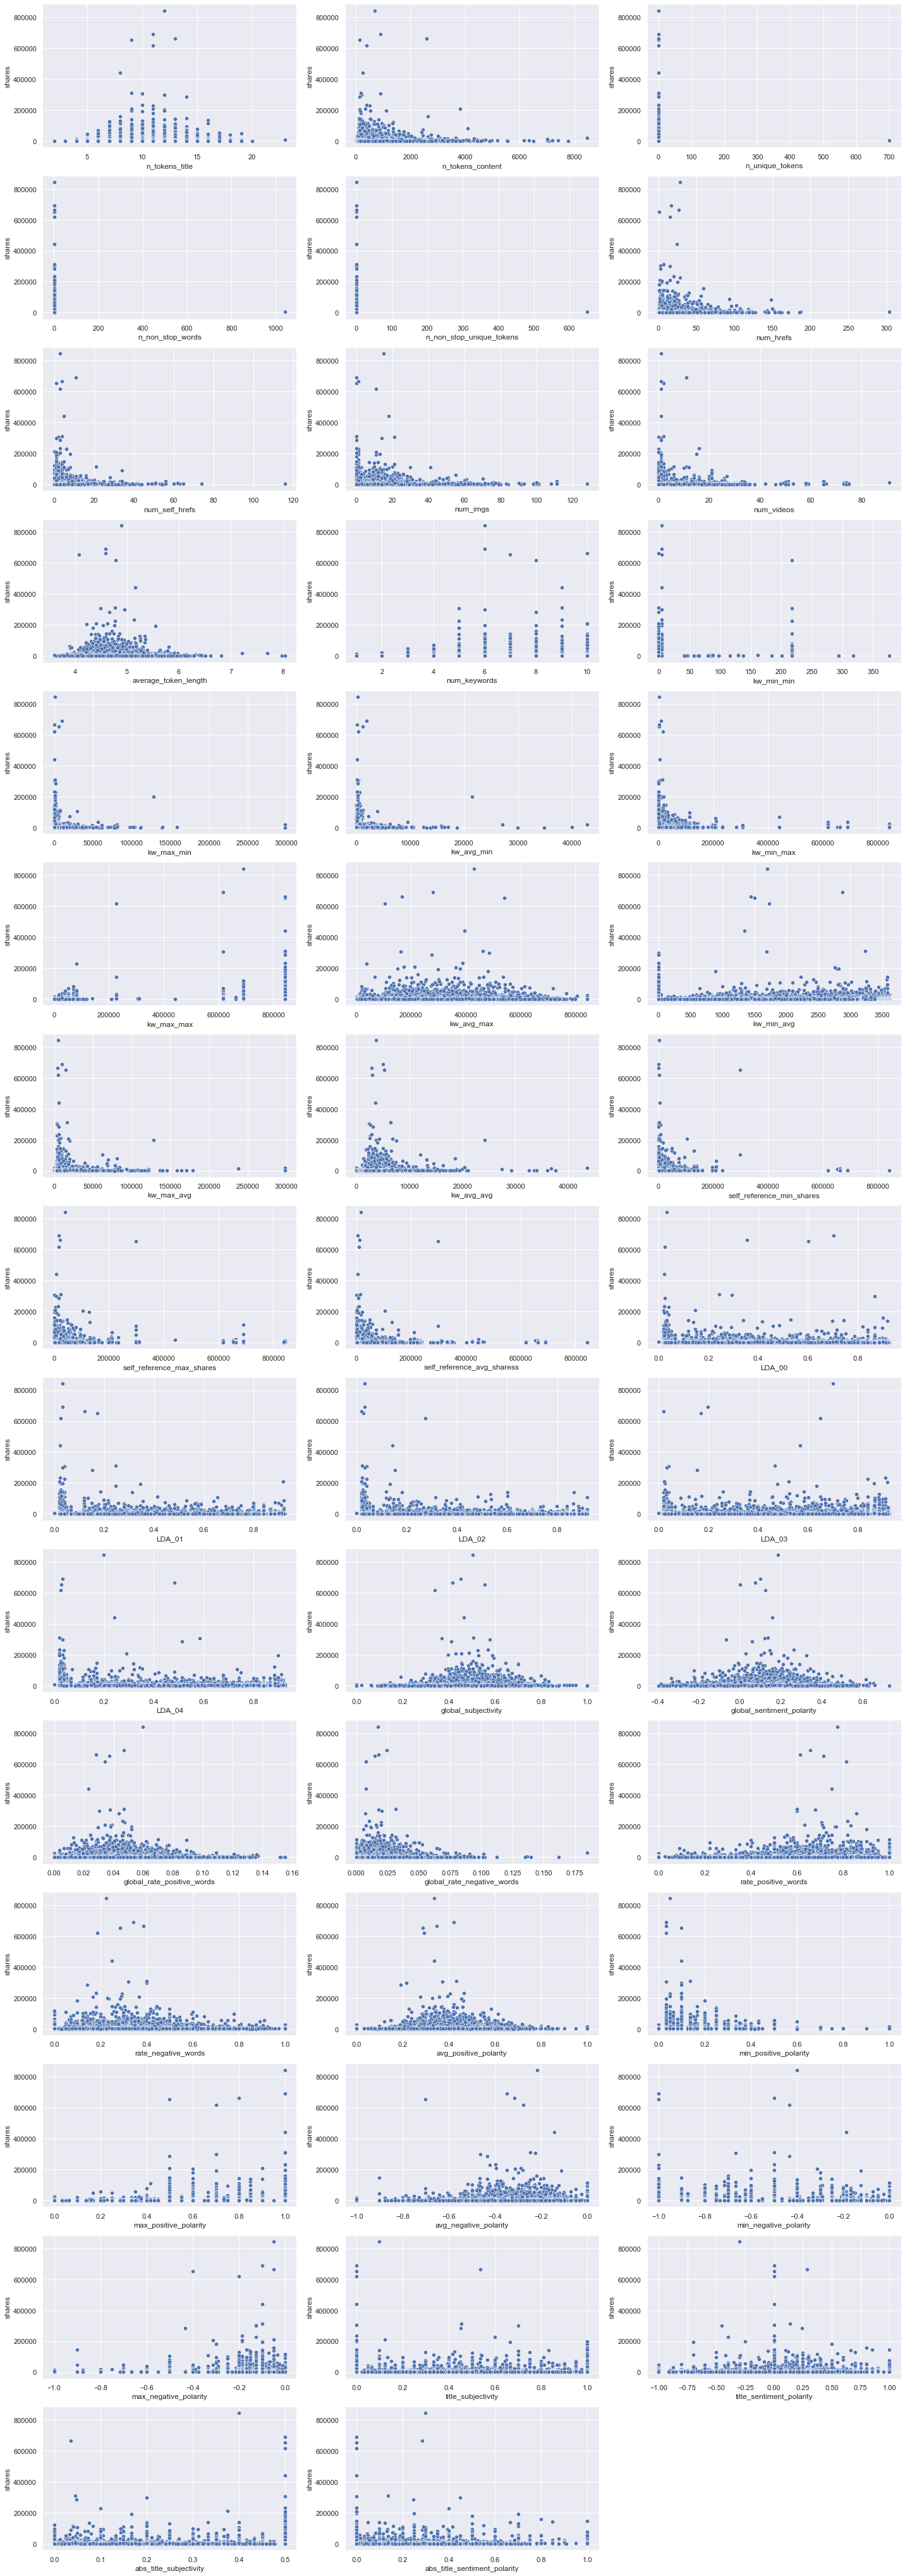

In [21]:
n=1
k=round(len(multi_value_cols)/3)+1

plt.figure(figsize=(20,60))
for i in multi_value_cols[:-1]:
    plt.subplot(k,3,n)
    sns.scatterplot(y=data["shares"], x=data[i])
    n+=1

plt.tight_layout()
plt.show()

# 4. Heatmap

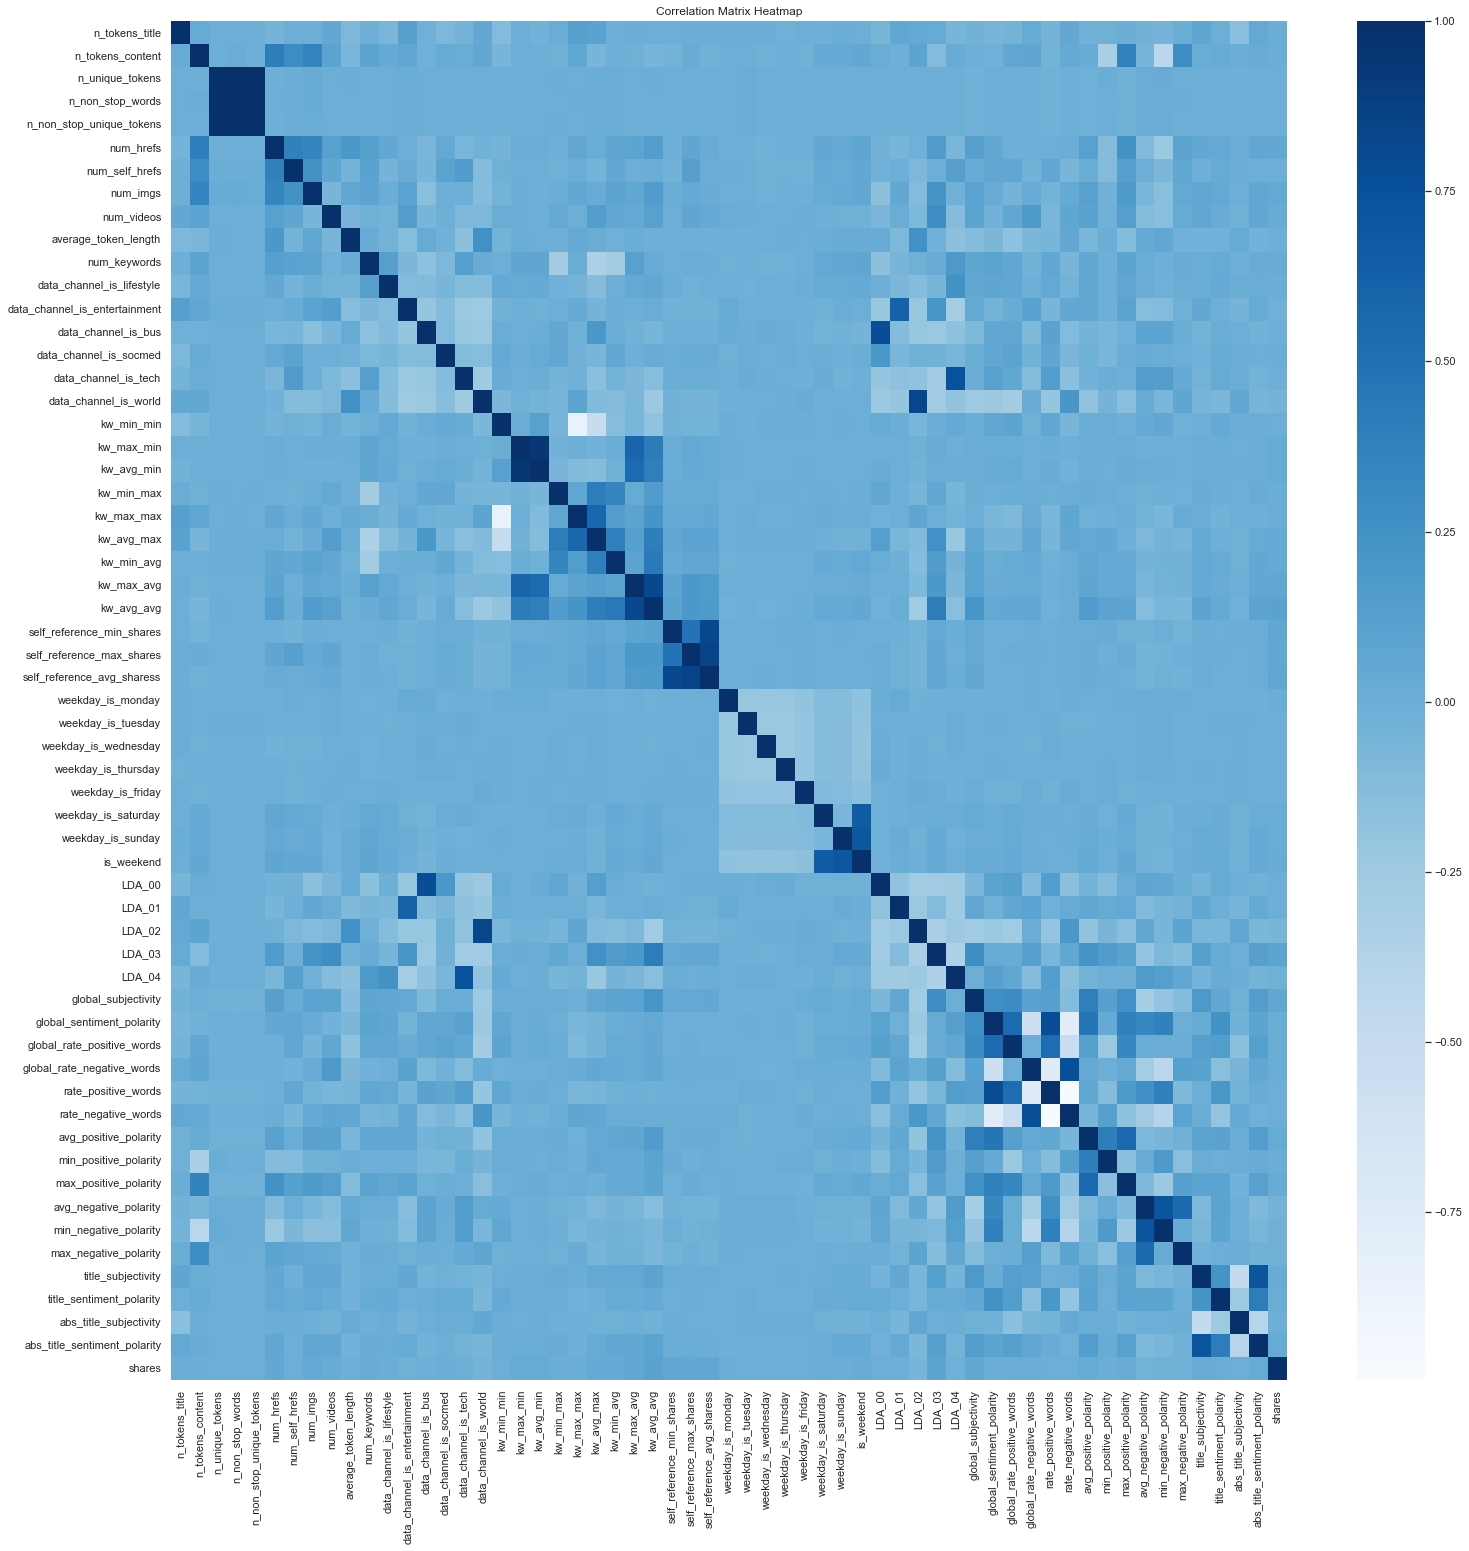

In [22]:
cor=data.corr()
plt.figure(figsize=(25,25))
sns.heatmap(cor, cmap='Blues')
plt.title("Correlation Matrix Heatmap")
plt.show()

**Outcomes** 

1. Several features have very strong correlation with each other. We may remove them if they are close to 1.

# Data Pre-processing 
# 5. Removal of Strongly correlated elements

In [23]:
cor = data.corr()
# Convert the correlation matrix into a Series
cor_series = cor.unstack()
# Sort the correlation values in descending order
sorted_cor = cor_series.sort_values(ascending=False)
# Filter out the pairs with perfect correlation (correlation of 1) and self-correlations
sorted_cor = sorted_cor[(sorted_cor < 1) & (sorted_cor > -1)]
sorted_cor[:40:2]

n_non_stop_unique_tokens      n_unique_tokens                  0.999899
n_non_stop_words              n_unique_tokens                  0.999590
                              n_non_stop_unique_tokens         0.999538
kw_avg_min                    kw_max_min                       0.940229
self_reference_max_shares     self_reference_avg_sharess       0.853182
LDA_02                        data_channel_is_world            0.835615
self_reference_min_shares     self_reference_avg_sharess       0.818657
kw_max_avg                    kw_avg_avg                       0.816447
rate_positive_words           global_sentiment_polarity        0.779780
data_channel_is_bus           LDA_00                           0.774375
global_rate_negative_words    rate_negative_words              0.759929
data_channel_is_tech          LDA_04                           0.749417
min_negative_polarity         avg_negative_polarity            0.717934
abs_title_sentiment_polarity  title_subjectivity               0

**Outcomes** 

1. Remove "n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min" as they have correlation of almost 1 with "n_unique_tokens"

In [24]:
print(data['n_non_stop_words'].describe())

count    38463.000000
mean         1.027065
std          5.307978
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1042.000000
Name: n_non_stop_words, dtype: float64


### 6. Remove "n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"

In [25]:
try:
    data.drop(labels=['n_non_stop_unique_tokens', 'n_non_stop_words','kw_avg_min'], axis = 1, inplace=True)
except:
    pass
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# DV : 5. Shares v/s n_tokens_title

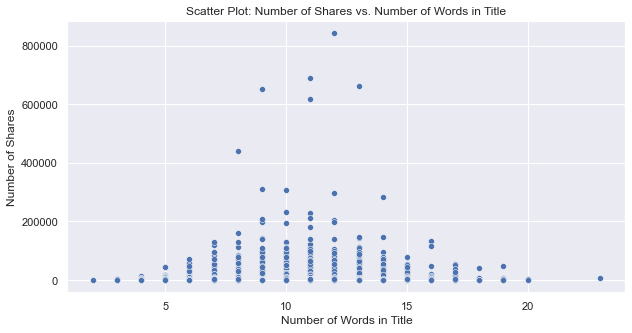

In [26]:
plt.figure(figsize=(10, 5))

# Create the scatter plot
ax = sns.scatterplot(y='shares', x='n_tokens_title', data=data)

# Customize the plot if needed (optional)
# For example, you can set x and y-axis labels and a title:
ax.set_xlabel("Number of Words in Title")
ax.set_ylabel("Number of Shares")
plt.title("Scatter Plot: Number of Shares vs. Number of Words in Title")

# Show the plot
plt.show()

## 6. Plot of Shares , Hist(shares) & Hist(log(Shares))

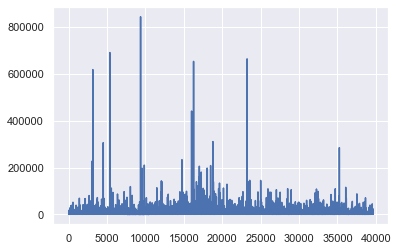

In [27]:
plt.plot(data['shares'])

Text(0, 0.5, 'Frequency')

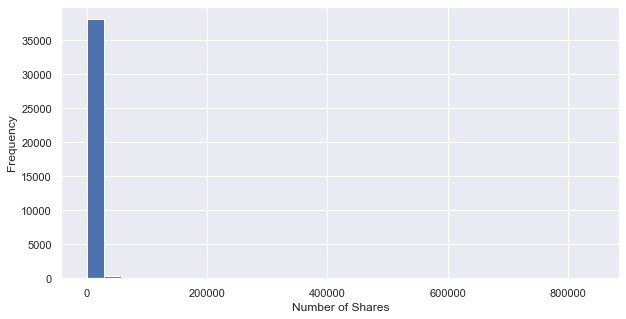

In [28]:
plt.figure(figsize=(10, 5))
plt.hist(data['shares'],bins=30)
plt.xlabel("Number of Shares")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

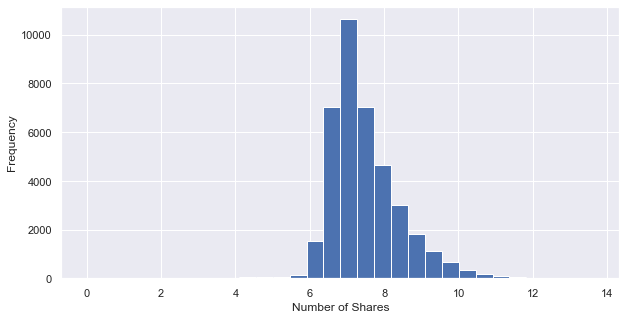

In [29]:
plt.figure(figsize=(10, 5))
plt.hist(np.log(data['shares']),bins=30)
plt.xlabel("Number of Shares")
plt.ylabel("Frequency")

# Classification Problem Conversion

## 1. Use the median as a seperator and divide the shares into Popular and Unpopular

In [30]:
data['shares'].describe()

count     38463.000000
mean       3355.360398
std       11585.968776
min           1.000000
25%         945.000000
50%        1400.000000
75%        2700.000000
max      843300.000000
Name: shares, dtype: float64

In [31]:
data['popularity'] = data['shares'].apply(lambda x: 0 if x <1400 else 1)

<AxesSubplot:xlabel='popularity', ylabel='count'>

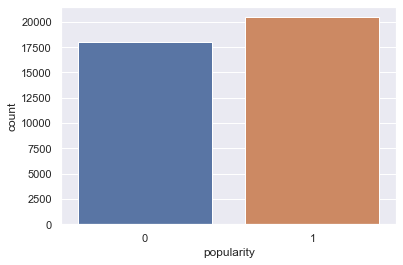

In [32]:
sns.countplot(x='popularity',data=data)

**Outcomes** 

1. If x>=1400 -> Popular
2. If x<1400 -> Unpopular

# 2. Data split based on the mean and the median.

In [33]:
data_mean = data['shares'].describe()['mean']
data_median = data['shares'].describe()['50%']
print(data_mean,data_median)

3355.3603983048642 1400.0


# 3. Count plot of popular/unpopular news over different day of week (Mean)

In [34]:
week_days = data.columns.values[26:33]
week_days

array(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday'], dtype=object)

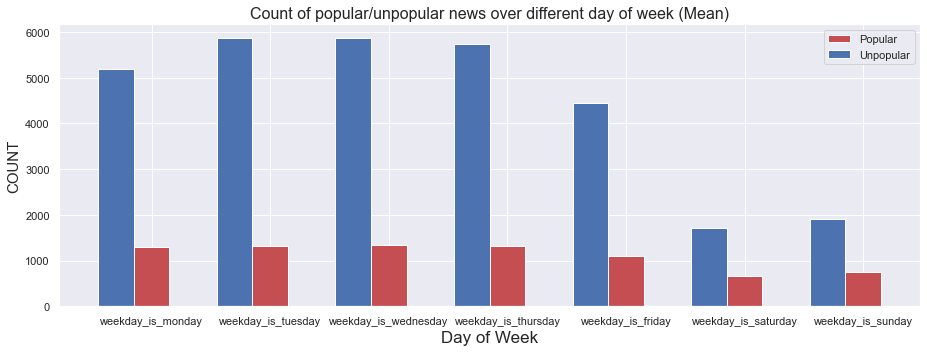

In [35]:
Unpop=data[data['shares']<data_mean]
Pop=data[data['shares']>=data_mean]
Unpop_day = Unpop[week_days].sum().values
Pop_day = Pop[week_days].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Mean)", fontsize = 16)

plt.bar(np.arange(len(week_days)),Pop_day,width=0.3,align='center',color='r',label='Popular')
plt.bar(np.arange(len(week_days))-0.3,Unpop_day,width=0.3,align='center',color='b',label='Unpopular')

plt.xticks(np.arange(len(week_days)),week_days)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('Day of Week',fontsize=17)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

# 4. Count plot of popular/unpopular news over different day of week (Median)

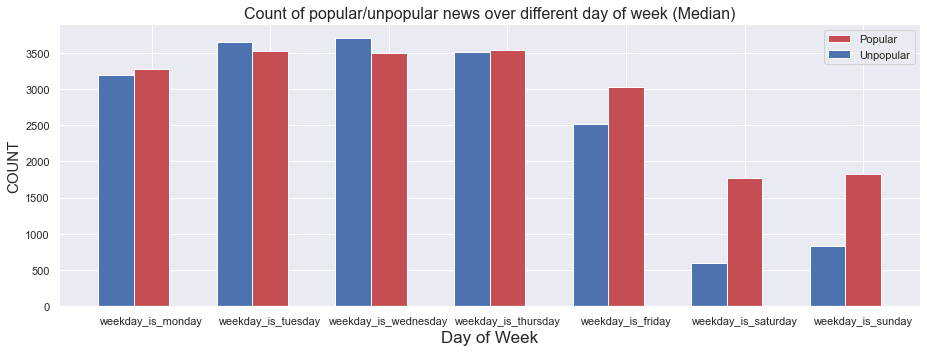

In [36]:
Unpop=data[data['shares']<data_median]
Pop=data[data['shares']>=data_median]
Unpop_day = Unpop[week_days].sum().values
Pop_day = Pop[week_days].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Median)", fontsize = 16)

plt.bar(np.arange(len(week_days)),Pop_day,width=0.3,align='center',color='r',label='Popular')
plt.bar(np.arange(len(week_days))-0.3,Unpop_day,width=0.3,align='center',color='b',label='Unpopular')

plt.xticks(np.arange(len(week_days)),week_days)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('Day of Week',fontsize=17)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

# 5. Count plot of data_channel TYPES over different day of week (Mean)

In [37]:
data_channel=data.columns[9:15]
data_channel

Index(['data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world'],
      dtype='object')

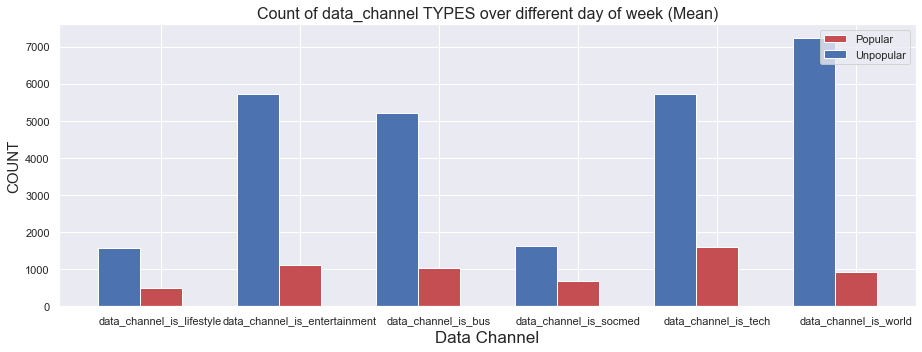

In [38]:
Unpop=data[data['shares']<data_mean]
Pop=data[data['shares']>=data_mean]
Unpop_day = Unpop[data_channel].sum().values
Pop_day = Pop[data_channel].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of data_channel TYPES over different day of week (Mean)", fontsize = 16)

plt.bar(np.arange(len(data_channel)),Pop_day,width=0.3,align='center',color='r',label='Popular')
plt.bar(np.arange(len(data_channel))-0.3,Unpop_day,width=0.3,align='center',color='b',label='Unpopular')

plt.xticks(np.arange(len(data_channel)),data_channel)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('Data Channel',fontsize=17)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

# 6. Count plot of data_channel TYPES over different day of week (Median)

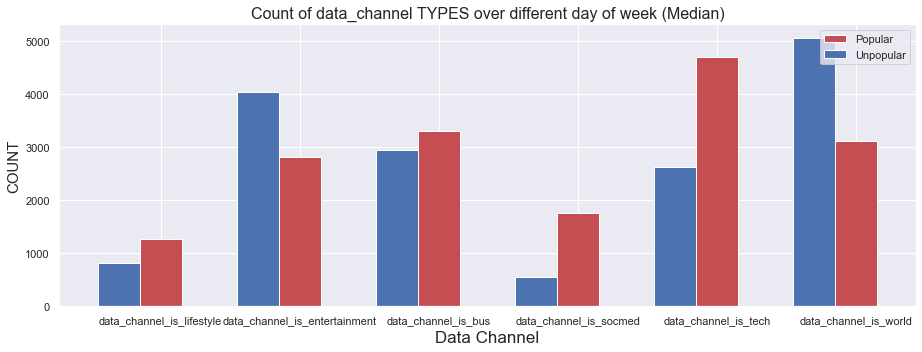

In [39]:
Unpop=data[data['shares']<data_median]
Pop=data[data['shares']>=data_median]
Unpop_day = Unpop[data_channel].sum().values
Pop_day = Pop[data_channel].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of data_channel TYPES over different day of week (Median)", fontsize = 16)

plt.bar(np.arange(len(data_channel)),Pop_day,width=0.3,align='center',color='r',label='Popular')
plt.bar(np.arange(len(data_channel))-0.3,Unpop_day,width=0.3,align='center',color='b',label='Unpopular')

plt.xticks(np.arange(len(data_channel)),data_channel)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('Data Channel',fontsize=17)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

# 7. Remove the shares column as it a classification problem now

In [40]:
data['popularity'] = data['shares'].apply(lambda x: 0 if x <1400 else 1)

In [41]:
X = data.drop(['shares','popularity'],axis=1)
y = data['popularity']

## **Training set - Test set Split**

In [42]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

# Outlier Removal

In [43]:
X_train_cap = X_train.copy()
X_test_cap = X_test.copy()

for col in X_train_cap.columns:
    percentiles_1_99 = X_train_cap[col].quantile([0.01,0.99]).values
    X_train_cap[col] = np.clip(X_train_cap[col], percentiles_1_99[0], percentiles_1_99[1])
    
for col in X_test_cap.columns:
    percentiles_1_99 = X_test_cap[col].quantile([0.01,0.99]).values
    X_test_cap[col] = np.clip(X_test_cap[col], percentiles_1_99[0], percentiles_1_99[1])

**Outcomes** 

1. REMOVE ANYTHING ABOVE 99TH PERCENTILE AND ANYTHING BELOW 1 PERCENTILE

# StandardScaler applied to Data

In [44]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Evaluators :

# General Code to predict and record the model performance

In [45]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    results = {}

    predictions_train = learner.predict(X_train)
    predictions_test = learner.predict(X_test)
    
    results['acc_train'] = accuracy_score(y_train,predictions_train)
    results['acc_test'] = accuracy_score(y_test,predictions_test)

    results['prec_train'] = precision_score(y_train,predictions_train)
    results['prec_test'] = precision_score(y_test,predictions_test)

    results['f1_train'] = f1_score(y_train,predictions_train)
    results['f1_test'] = f1_score(y_test,predictions_test)
    
    results['recall_train'] = recall_score(y_train, predictions_train)
    results['recall_test'] = recall_score(y_test, predictions_test)
    
    try:
        y_prob_train = learner.predict_proba(X_train)[:, 1]
        y_prob_test = learner.predict_proba(X_test)[:, 1]
        results['auc_train'] = roc_auc_score(y_train,y_prob_train)
        results['auc_test'] = roc_auc_score(y_test,y_prob_test)
    except:
        print("Probability cannot be found for this model.")
    
    results['f_train'] = fbeta_score(y_train,predictions_train,beta=1)
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=1)
    
    results['classification_report_train'] = classification_report(y_train, predictions_train)
    results['classification_report_test'] = classification_report(y_test, predictions_test)
    
    for x in results:
        print(f"{x} : {results[x]}")
    
    return results

**Outcomes** 

1. accuracy, f1, precision, recall with auroc is recorded
2. A classification report is also made.
3. These are made and recorded in form of a set for any model created from hereon.

# Confusion Matrix

In [46]:
def plot_cm(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# MODELS

# LogisticRegression

In [50]:
logisticRegression = LogisticRegression(random_state=42)

acc_train : 0.6583035424114397
acc_test : 0.6505914467697907
prec_train : 0.6719365265941816
prec_test : 0.6676966959828856
f1_train : 0.6850209706411025
f1_test : 0.6763785215506862
recall_train : 0.6986251145737855
recall_test : 0.6852890949011954
auc_train : 0.7140084498531367
auc_test : 0.6977638043835224
f_train : 0.6850209706411025
f_test : 0.6763785215506862
classification_report_train :               precision    recall  f1-score   support

           0       0.64      0.61      0.63     14405
           1       0.67      0.70      0.69     16365

    accuracy                           0.66     30770
   macro avg       0.66      0.66      0.66     30770
weighted avg       0.66      0.66      0.66     30770

classification_report_test :               precision    recall  f1-score   support

           0       0.63      0.61      0.62      3594
           1       0.67      0.69      0.68      4099

    accuracy                           0.65      7693
   macro avg       0.65     

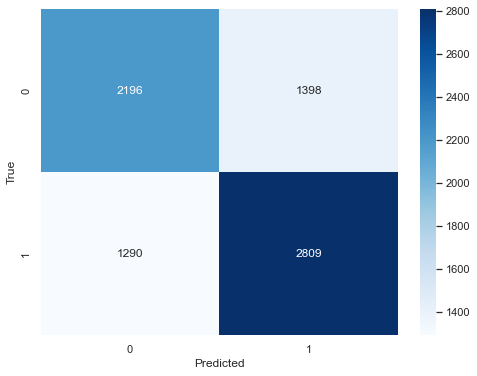

In [51]:
logisticRegression.fit(X_train,y_train)
logisticRegression_result = train_predict(logisticRegression, X_train.shape[0], X_train, y_train, X_test, y_test)
plot_cm(y_test,logisticRegression.predict(X_test))

# Linear SVM :

In [52]:
linear_svm = SVC(kernel = 'linear', random_state = 42)

In [53]:
linear_svm.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

Probability cannot be found for this model.
acc_train : 0.6554761130971726
acc_test : 0.6494215520603146
prec_train : 0.6705931099798745
prec_test : 0.6693236714975845
f1_train : 0.6812592080339157
f1_test : 0.6726544483553829
recall_train : 0.6922700886037275
recall_test : 0.6760185411075872
f_train : 0.6812592080339157
f_test : 0.6726544483553829
classification_report_train :               precision    recall  f1-score   support

           0       0.64      0.61      0.63     14405
           1       0.67      0.69      0.68     16365

    accuracy                           0.66     30770
   macro avg       0.65      0.65      0.65     30770
weighted avg       0.65      0.66      0.65     30770

classification_report_test :               precision    recall  f1-score   support

           0       0.63      0.62      0.62      3594
           1       0.67      0.68      0.67      4099

    accuracy                           0.65      7693
   macro avg       0.65      0.65      0.65  

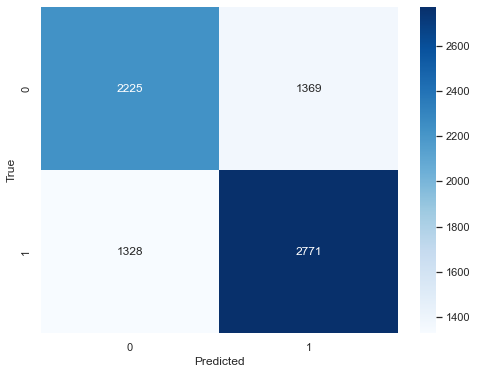

In [54]:
linear_svm_result = train_predict(linear_svm, X_train.shape[0], X_train, y_train, X_test, y_test)
plot_cm(y_test,linear_svm.predict(X_test))

# Kernel SVM :

In [55]:
kernel_svm = SVC(kernel = 'rbf', random_state = 42)

Probability cannot be found for this model.
acc_train : 0.7205394865128372
acc_test : 0.6559209671129599
prec_train : 0.7285193032015066
prec_test : 0.6709039548022598
f1_train : 0.7422130287495877
f1_test : 0.6828800766742542
recall_train : 0.7564314084937366
recall_test : 0.6952915345206148
f_train : 0.7422130287495877
f_test : 0.6828800766742542
classification_report_train :               precision    recall  f1-score   support

           0       0.71      0.68      0.69     14405
           1       0.73      0.76      0.74     16365

    accuracy                           0.72     30770
   macro avg       0.72      0.72      0.72     30770
weighted avg       0.72      0.72      0.72     30770

classification_report_test :               precision    recall  f1-score   support

           0       0.64      0.61      0.62      3594
           1       0.67      0.70      0.68      4099

    accuracy                           0.66      7693
   macro avg       0.65      0.65      0.65  

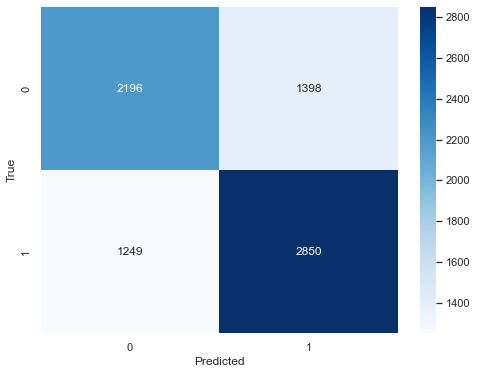

In [56]:
kernel_svm.fit(X_train,y_train)
kernel_svm_result = train_predict(kernel_svm, X_train.shape[0], X_train, y_train, X_test, y_test)
plot_cm(y_test,kernel_svm.predict(X_test))

# Naive Bayes

In [57]:
gaussianNB = GaussianNB()

acc_train : 0.5692557686057849
acc_test : 0.5566099051085402
prec_train : 0.7382447541736866
prec_test : 0.715
f1_train : 0.4210710229754521
f1_test : 0.40147394279698195
recall_train : 0.2945310113046135
recall_test : 0.27909246157599416
auc_train : 0.6784407890418096
auc_test : 0.66216440129608
f_train : 0.4210710229754521
f_test : 0.40147394279698195
classification_report_train :               precision    recall  f1-score   support

           0       0.52      0.88      0.66     14405
           1       0.74      0.29      0.42     16365

    accuracy                           0.57     30770
   macro avg       0.63      0.59      0.54     30770
weighted avg       0.64      0.57      0.53     30770

classification_report_test :               precision    recall  f1-score   support

           0       0.52      0.87      0.65      3594
           1       0.71      0.28      0.40      4099

    accuracy                           0.56      7693
   macro avg       0.62      0.58      0

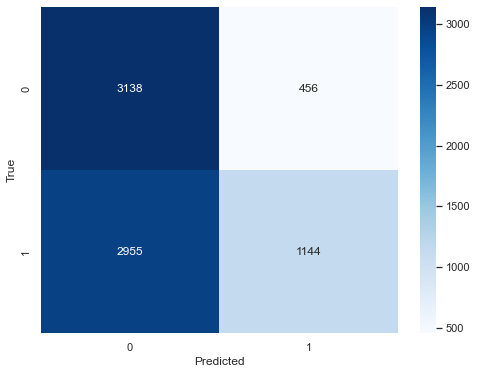

In [58]:
gaussianNB.fit(X_train,y_train)
gaussianNB_result = train_predict(gaussianNB, X_train.shape[0], X_train, y_train, X_test, y_test)
plot_cm(y_test,gaussianNB.predict(X_test))

# KNN

In [59]:
kNeighborsClassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

acc_train : 0.7416964575885603
acc_test : 0.5957363837254647
prec_train : 0.7644028397311051
prec_test : 0.6280756280756281
f1_train : 0.7537946843442166
f1_test : 0.6092964824120602
recall_train : 0.7434769324778491
recall_test : 0.5916077091973652
auc_train : 0.8203923065804141
auc_test : 0.6290382862766453
f_train : 0.7537946843442166
f_test : 0.6092964824120602
classification_report_train :               precision    recall  f1-score   support

           0       0.72      0.74      0.73     14405
           1       0.76      0.74      0.75     16365

    accuracy                           0.74     30770
   macro avg       0.74      0.74      0.74     30770
weighted avg       0.74      0.74      0.74     30770

classification_report_test :               precision    recall  f1-score   support

           0       0.56      0.60      0.58      3594
           1       0.63      0.59      0.61      4099

    accuracy                           0.60      7693
   macro avg       0.60     

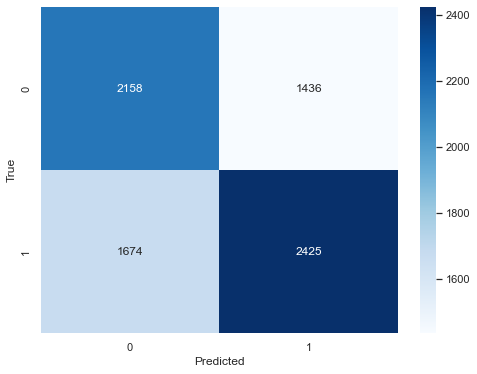

In [60]:
kNeighborsClassifier.fit(X_train,y_train)
kNeighborsClassifier_result = train_predict(kNeighborsClassifier, X_train.shape[0], X_train, y_train, X_test, y_test)
plot_cm(y_test,kNeighborsClassifier.predict(X_test))

# Bagging

In [61]:
baggingClassifier = BaggingClassifier(random_state=42)

acc_train : 0.9846928826779331
acc_test : 0.6191342779149877
prec_train : 0.9932960893854749
prec_test : 0.6593946004908645
f1_train : 0.9854965357967668
f1_test : 0.6227143960855009
recall_train : 0.9778185151237397
recall_test : 0.5898999756038058
auc_train : 0.9989506626694296
auc_test : 0.6696190541743491
f_train : 0.9854965357967668
f_test : 0.6227143960855009
classification_report_train :               precision    recall  f1-score   support

           0       0.98      0.99      0.98     14405
           1       0.99      0.98      0.99     16365

    accuracy                           0.98     30770
   macro avg       0.98      0.99      0.98     30770
weighted avg       0.98      0.98      0.98     30770

classification_report_test :               precision    recall  f1-score   support

           0       0.58      0.65      0.62      3594
           1       0.66      0.59      0.62      4099

    accuracy                           0.62      7693
   macro avg       0.62     

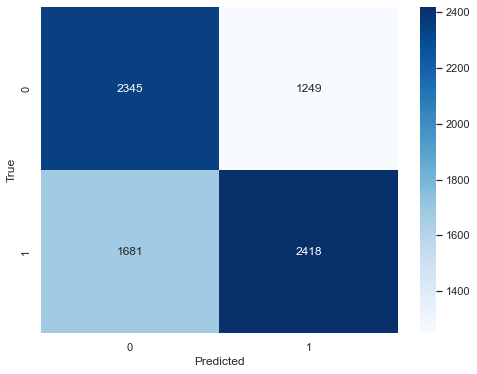

In [62]:
baggingClassifier.fit(X_train,y_train)
baggingClassifier_result = train_predict(baggingClassifier, X_train.shape[0], X_train, y_train, X_test, y_test)
plot_cm(y_test, baggingClassifier.predict(X_test))

# SGD

In [63]:
sgdClassifier = SGDClassifier()

Probability cannot be found for this model.
acc_train : 0.644263893402665
acc_test : 0.633692967632913
prec_train : 0.6587566649088885
prec_test : 0.6523186682520808
f1_train : 0.6725891361569755
f1_test : 0.6606454720616571
recall_train : 0.687014970974641
recall_test : 0.6691876067333496
f_train : 0.6725891361569755
f_test : 0.6606454720616571
classification_report_train :               precision    recall  f1-score   support

           0       0.63      0.60      0.61     14405
           1       0.66      0.69      0.67     16365

    accuracy                           0.64     30770
   macro avg       0.64      0.64      0.64     30770
weighted avg       0.64      0.64      0.64     30770

classification_report_test :               precision    recall  f1-score   support

           0       0.61      0.59      0.60      3594
           1       0.65      0.67      0.66      4099

    accuracy                           0.63      7693
   macro avg       0.63      0.63      0.63     

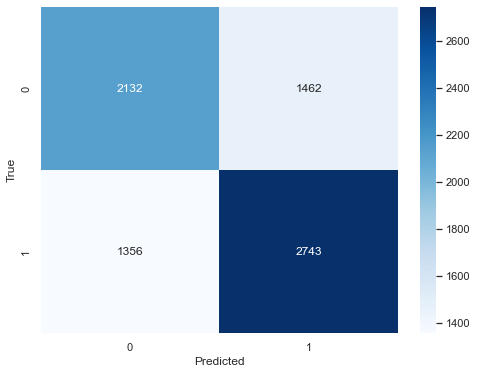

In [64]:
sgdClassifier.fit(X_train,y_train)
sgdClassifier_result = train_predict(sgdClassifier, X_train.shape[0], X_train, y_train, X_test, y_test)
plot_cm(y_test, sgdClassifier.predict(X_test))

# DecisionTreeClassifier

In [65]:
decisionTreeClassifier = DecisionTreeClassifier(random_state=42)

acc_train : 1.0
acc_test : 0.5797478226959574
prec_train : 1.0
prec_test : 0.6077114427860697
f1_train : 1.0
f1_test : 0.6017982510161352
recall_train : 1.0
recall_test : 0.5959990241522323
auc_train : 1.0
auc_test : 0.5786060785758378
f_train : 1.0
f_test : 0.6017982510161352
classification_report_train :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14405
           1       1.00      1.00      1.00     16365

    accuracy                           1.00     30770
   macro avg       1.00      1.00      1.00     30770
weighted avg       1.00      1.00      1.00     30770

classification_report_test :               precision    recall  f1-score   support

           0       0.55      0.56      0.56      3594
           1       0.61      0.60      0.60      4099

    accuracy                           0.58      7693
   macro avg       0.58      0.58      0.58      7693
weighted avg       0.58      0.58      0.58      7693



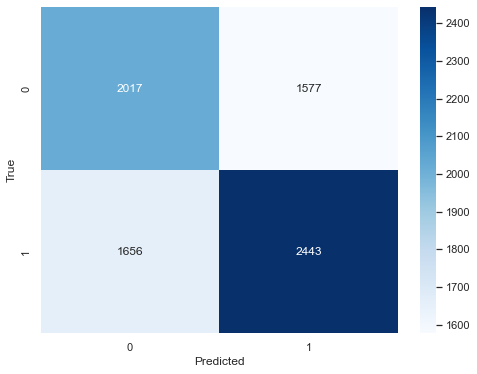

In [66]:
decisionTreeClassifier.fit(X_train,y_train)
decisionTreeClassifier_result = train_predict(decisionTreeClassifier, X_train.shape[0], X_train, y_train, X_test, y_test)
plot_cm(y_test, decisionTreeClassifier.predict(X_test))

# RandomForestClassifier

In [67]:
randomForestClassifier = RandomForestClassifier(random_state=42)

acc_train : 1.0
acc_test : 0.6589106980371766
prec_train : 1.0
prec_test : 0.6721120186697783
f1_train : 1.0
f1_test : 0.6870229007633588
recall_train : 1.0
recall_test : 0.7026103927787265
auc_train : 1.0
auc_test : 0.7122906044241961
f_train : 1.0
f_test : 0.6870229007633588
classification_report_train :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14405
           1       1.00      1.00      1.00     16365

    accuracy                           1.00     30770
   macro avg       1.00      1.00      1.00     30770
weighted avg       1.00      1.00      1.00     30770

classification_report_test :               precision    recall  f1-score   support

           0       0.64      0.61      0.63      3594
           1       0.67      0.70      0.69      4099

    accuracy                           0.66      7693
   macro avg       0.66      0.66      0.66      7693
weighted avg       0.66      0.66      0.66      7693



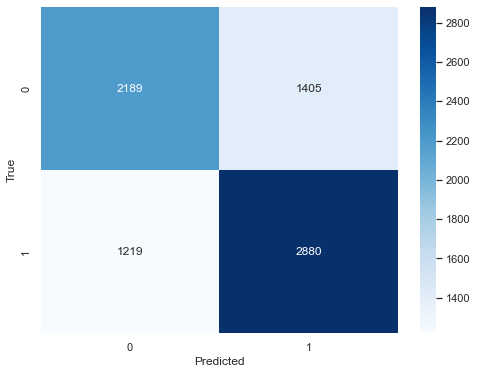

In [68]:
randomForestClassifier.fit(X_train,y_train)
randomForestClassifier_result = train_predict(randomForestClassifier, X_train.shape[0], X_train, y_train, X_test, y_test)
plot_cm(y_test, randomForestClassifier.predict(X_test))

# BOOSTERS:

## ADABOOST:

In [69]:
adaBoostClassifier = AdaBoostClassifier(random_state=42)

acc_train : 0.6702957426064349
acc_test : 0.6541011308982192
prec_train : 0.6846135581146859
prec_test : 0.6718451242829828
f1_train : 0.694528921140586
f1_test : 0.678739587106121
recall_train : 0.7047357164680721
recall_test : 0.6857770187850696
auc_train : 0.7347317152009866
auc_test : 0.7114307302173271
f_train : 0.694528921140586
f_test : 0.678739587106121
classification_report_train :               precision    recall  f1-score   support

           0       0.65      0.63      0.64     14405
           1       0.68      0.70      0.69     16365

    accuracy                           0.67     30770
   macro avg       0.67      0.67      0.67     30770
weighted avg       0.67      0.67      0.67     30770

classification_report_test :               precision    recall  f1-score   support

           0       0.63      0.62      0.63      3594
           1       0.67      0.69      0.68      4099

    accuracy                           0.65      7693
   macro avg       0.65      0.6

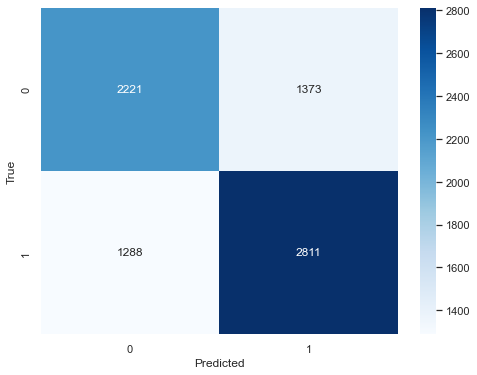

In [70]:
adaBoostClassifier.fit(X_train,y_train)
adaBoostClassifier_result = train_predict(adaBoostClassifier, X_train.shape[0], X_train, y_train, X_test, y_test)
plot_cm(y_test, adaBoostClassifier.predict(X_test))

## XGBOOST:

In [71]:
xgb_classifier = XGBClassifier()

acc_train : 0.8549236269093272
acc_test : 0.6522812946834785
prec_train : 0.8606145082116236
prec_test : 0.670416467209191
f1_train : 0.8641757439298972
f1_test : 0.6768152712335388
recall_train : 0.8677665750076382
recall_test : 0.6833373993656989
auc_train : 0.934386702685494
auc_test : 0.7104573940221586
f_train : 0.8641757439298972
f_test : 0.6768152712335388
classification_report_train :               precision    recall  f1-score   support

           0       0.85      0.84      0.84     14405
           1       0.86      0.87      0.86     16365

    accuracy                           0.85     30770
   macro avg       0.85      0.85      0.85     30770
weighted avg       0.85      0.85      0.85     30770

classification_report_test :               precision    recall  f1-score   support

           0       0.63      0.62      0.62      3594
           1       0.67      0.68      0.68      4099

    accuracy                           0.65      7693
   macro avg       0.65      0

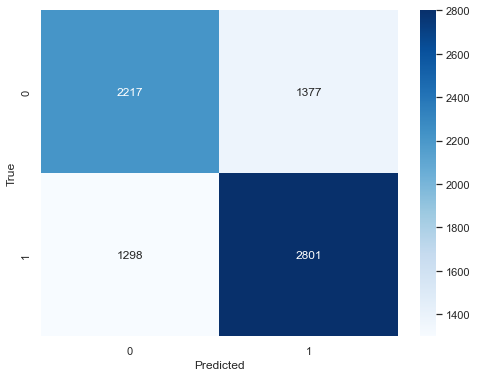

In [72]:
xgb_classifier.fit(X_train, y_train)
xgb_classifier_result = train_predict(xgb_classifier, X_train.shape[0], X_train, y_train, X_test, y_test)
plot_cm(y_test, xgb_classifier.predict(X_test))

## LGBMClassifier:

In [73]:
lgbm=lgb.LGBMClassifier()

acc_train : 0.7497562560935976
acc_test : 0.6695697387235149
prec_train : 0.7551080492256963
prec_test : 0.6846975088967971
f1_train : 0.7691015952980689
f1_test : 0.6942506615347607
recall_train : 0.7836235869233119
recall_test : 0.7040741644303489
auc_train : 0.831838831973613
auc_test : 0.7246998093784291
f_train : 0.7691015952980689
f_test : 0.6942506615347607
classification_report_train :               precision    recall  f1-score   support

           0       0.74      0.71      0.73     14405
           1       0.76      0.78      0.77     16365

    accuracy                           0.75     30770
   macro avg       0.75      0.75      0.75     30770
weighted avg       0.75      0.75      0.75     30770

classification_report_test :               precision    recall  f1-score   support

           0       0.65      0.63      0.64      3594
           1       0.68      0.70      0.69      4099

    accuracy                           0.67      7693
   macro avg       0.67      

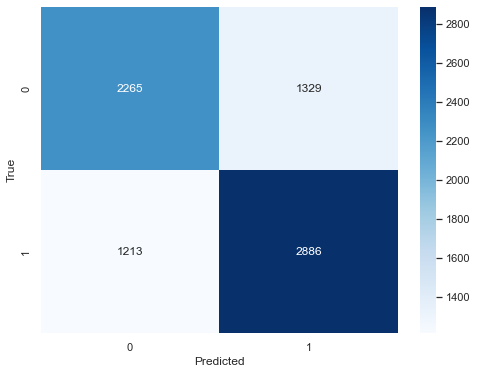

In [74]:
lgbm.fit(X_train, y_train)
lgbm_result = train_predict(lgbm, X_train.shape[0], X_train, y_train, X_test, y_test)
plot_cm(y_test, lgbm.predict(X_test))

## Grid Search for the Best hyperparams for random forest classifier:

In [75]:
rf=RandomForestClassifier(random_state=1)

params={'n_estimators':sp_randint(5,25),
       'criterion':['gini','entropy'],
       'max_depth':sp_randint(2,10),
       'min_samples_split':sp_randint(2,20),
       'min_samples_leaf':sp_randint(1,20),
       'max_features':sp_randint(2,15)}
rand_search_rfc=RandomizedSearchCV(rf,param_distributions=params,cv=3,random_state=1)

rand_search_rfc.fit(X_train,y_train)

print(rand_search_rfc.best_params_)

rf=RandomForestClassifier(**rand_search_rfc.best_params_)
rf.fit(X_train,y_train)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 14, 'min_samples_leaf': 7, 'min_samples_split': 7, 'n_estimators': 23}


RandomForestClassifier(criterion='entropy', max_depth=7, max_features=14,
                       min_samples_leaf=7, min_samples_split=7,
                       n_estimators=23)

acc_train : 0.6871628209294768
acc_test : 0.6541011308982192
prec_train : 0.6878519261860958
prec_test : 0.6616456834532374
f1_train : 0.7193749635589761
f1_test : 0.6886626886626885
recall_train : 0.7539260617170791
recall_test : 0.7179799951207612
auc_train : 0.7589488386091625
auc_test : 0.7072758764268279
f_train : 0.7193749635589761
f_test : 0.6886626886626885
classification_report_train :               precision    recall  f1-score   support

           0       0.69      0.61      0.65     14405
           1       0.69      0.75      0.72     16365

    accuracy                           0.69     30770
   macro avg       0.69      0.68      0.68     30770
weighted avg       0.69      0.69      0.69     30770

classification_report_test :               precision    recall  f1-score   support

           0       0.64      0.58      0.61      3594
           1       0.66      0.72      0.69      4099

    accuracy                           0.65      7693
   macro avg       0.65     

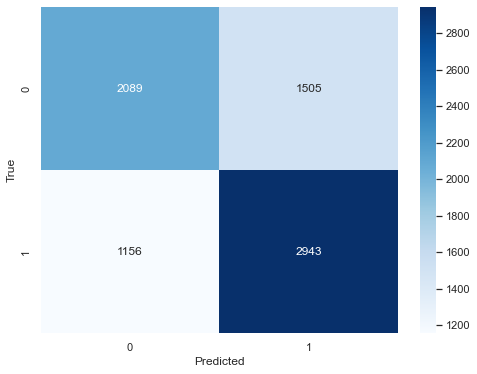

In [76]:
rf_result = train_predict(rf, X_train.shape[0], X_train, y_train, X_test, y_test)
plot_cm(y_test, rf.predict(X_test))

# Feature Importance Plot (describes how much each feature Contributes) :

In [97]:
# randomforest, adaboost, xgb
def feature_importance_plot(clf):
    clf.predict(X_test)
    tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': clf.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (16,4))
    plt.title('Features importance',fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()

# Feature Importance Plot (Random Forest) :

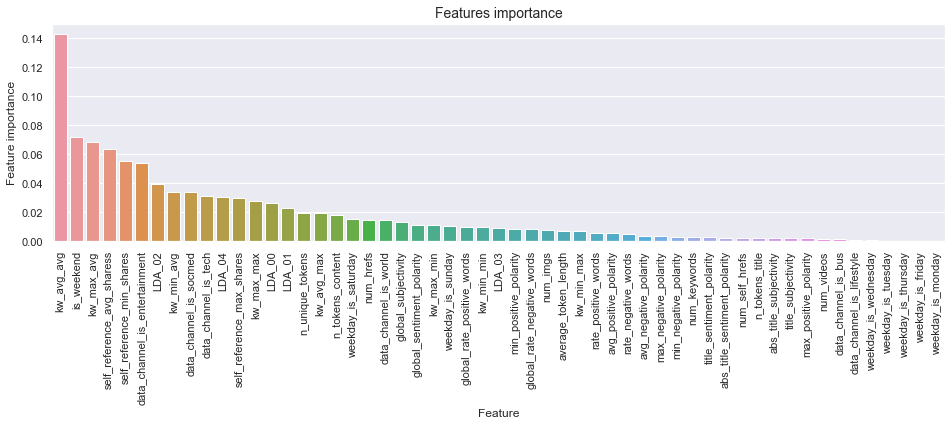

In [98]:
feature_importance_plot(rf)

# Feature Importance Plot (XGB) :

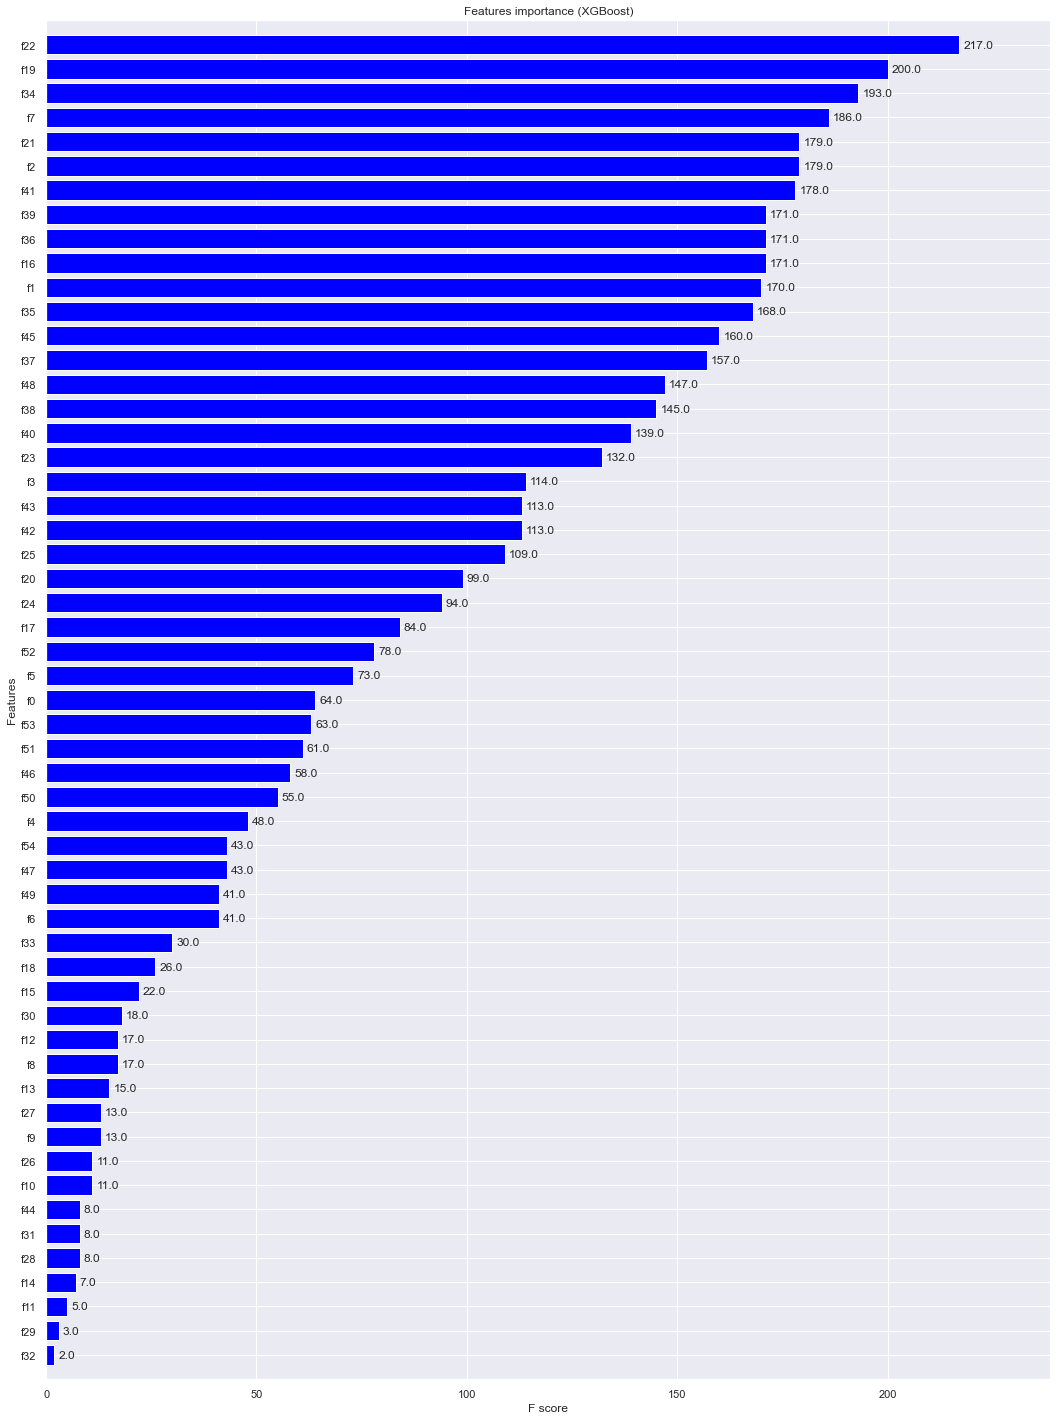

In [107]:
fig, (ax) = plt.subplots(ncols=1, figsize=(18,25))
xgb.plot_importance(xgb_classifier, height=0.8, title="Features importance (XGBoost)", ax=ax, color="blue") 
plt.show()

# Feature Importance Plot (lgb) :

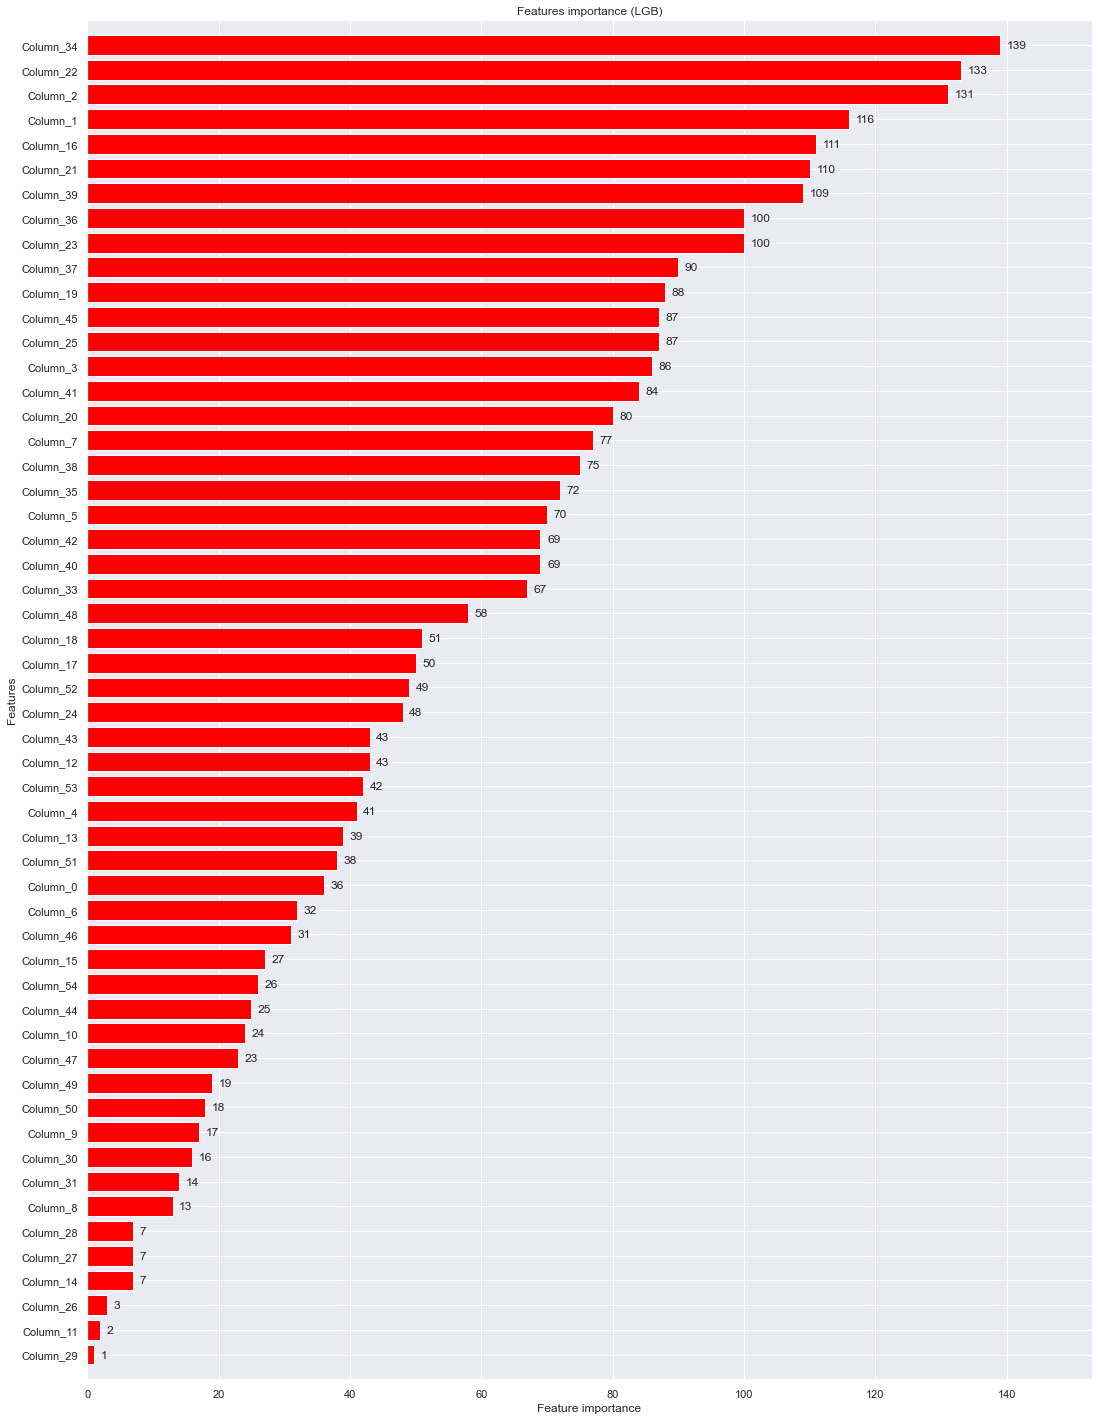

In [109]:
fig, (ax) = plt.subplots(ncols=1, figsize=(18,25))
lgb.plot_importance(lgbm, height=0.8, title="Features importance (LGB)", ax=ax, color="red") 
plt.show()

# Result compilation :

In [77]:
model_results=[
    logisticRegression_result,
    linear_svm_result,
    kernel_svm_result,
    gaussianNB_result,
    kNeighborsClassifier_result,
    decisionTreeClassifier_result,
    randomForestClassifier_result,
    baggingClassifier_result,
    sgdClassifier_result,
    adaBoostClassifier_result,
    xgb_classifier_result,
    lgbm_result,
    rf_result
]

models = [
    "logisticRegression",
    "linear_svm",
    "kernel_svm",
    "gaussianNB",
    "kNeighborsClassifier",
    "decisionTreeClassifier",
    "randomForestClassifier",
    "baggingClassifier",
    "sgdClassifier",
    "adaBoostClassifier",
    "xgb_classifier",
    "lgbm",
    "rf_tuned",
]

training_data_results = {
    "model": models,
    "model_accuracy": [model_results[i]['acc_train'] for i in range(len(model_results))],
    "model_precision": [model_results[i]['prec_train'] for i in range(len(model_results))],    
    "model_f1": [model_results[i]['f1_train'] for i in range(len(model_results))],    
    "model_recall": [model_results[i]['recall_train'] for i in range(len(model_results))],    
    "model_accuracy": [model_results[i]['acc_train'] for i in range(len(model_results))],
    "model_fbeta":[model_results[i]["f_train"] for i in range(len(model_results))],
}

training_data_results["model_auc"] = []
for i in range(len(models)):
    try:
        training_data_results["model_auc"].append(model_results[i]['auc_train'])
    except:
        training_data_results["model_auc"].append(0)
    
testing_data_results = {
    "model": models,
    "model_accuracy": [model_results[i]['acc_test'] for i in range(len(model_results))],
    "model_precision": [model_results[i]['prec_test'] for i in range(len(model_results))],    
    "model_f1": [model_results[i]['f1_test'] for i in range(len(model_results))],    
    "model_recall": [model_results[i]['recall_test'] for i in range(len(model_results))],    
    "model_accuracy": [model_results[i]['acc_test'] for i in range(len(model_results))],    
    "model_fbeta":[model_results[i]["f_test"] for i in range(len(model_results))],
}

testing_data_results["model_auc"] = []
for i in range(len(models)):
    try:
        testing_data_results["model_auc"].append(model_results[i]['auc_train'])
    except:
        testing_data_results["model_auc"].append(0)
        
training_data_results = pd.DataFrame(training_data_results)
testing_data_results = pd.DataFrame(testing_data_results)

# Compiled Results for train and test dataset

In [78]:
training_data_results

,model,model_accuracy,model_precision,model_f1,model_recall,model_fbeta,model_auc
0,logisticRegression,0.658304,0.671937,0.685021,0.698625,0.685021,0.714008
1,linear_svm,0.655476,0.670593,0.681259,0.692270,0.681259,0.000000
2,kernel_svm,0.720539,0.728519,0.742213,0.756431,0.742213,0.000000
3,gaussianNB,0.569256,0.738245,0.421071,0.294531,0.421071,0.678441
4,kNeighborsClassifier,0.741696,0.764403,0.753795,0.743477,0.753795,0.820392
5,decisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,randomForestClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,baggingClassifier,0.984693,0.993296,0.985497,0.977819,0.985497,0.998951
8,sgdClassifier,0.644264,0.658757,0.672589,0.687015,0.672589,0.000000
9,adaBoostClassifier,0.670296,0.684614,0.694529,0.704736,0.694529,0.734732


In [79]:
testing_data_results

,model,model_accuracy,model_precision,model_f1,model_recall,model_fbeta,model_auc
0,logisticRegression,0.650591,0.667697,0.676379,0.685289,0.676379,0.714008
1,linear_svm,0.649422,0.669324,0.672654,0.676019,0.672654,0.000000
2,kernel_svm,0.655921,0.670904,0.682880,0.695292,0.682880,0.000000
3,gaussianNB,0.556610,0.715000,0.401474,0.279092,0.401474,0.678441
4,kNeighborsClassifier,0.595736,0.628076,0.609296,0.591608,0.609296,0.820392
5,decisionTreeClassifier,0.579748,0.607711,0.601798,0.595999,0.601798,1.000000
6,randomForestClassifier,0.658911,0.672112,0.687023,0.702610,0.687023,1.000000
7,baggingClassifier,0.619134,0.659395,0.622714,0.589900,0.622714,0.998951
8,sgdClassifier,0.633693,0.652319,0.660645,0.669188,0.660645,0.000000
9,adaBoostClassifier,0.654101,0.671845,0.678740,0.685777,0.678740,0.734732


# Bar plots to Compare Model performances vs different metrics 

In [80]:
def make_evaluation_plots(data_results,x_axis,y_axis):
    plt.figure(figsize=(12, 6))
    colors = plt.cm.tab20(np.linspace(0, 1, data_results.shape[0]))
    plt.bar(data_results[x_axis], data_results[y_axis], color = colors)
    plt.xticks(rotation=90, ha='right')
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(f"{y_axis}")
    plt.tight_layout()

    # Display the plot
    plt.show()

In [81]:
eval_cols = training_data_results.columns
eval_cols

Index(['model', 'model_accuracy', 'model_precision', 'model_f1',
       'model_recall', 'model_fbeta', 'model_auc'],
      dtype='object')

# Bar plots to Compare Model performances vs different metrics over Training Data

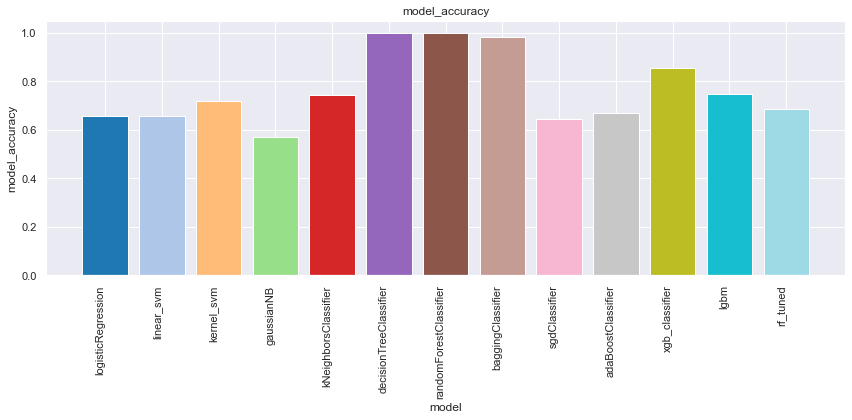

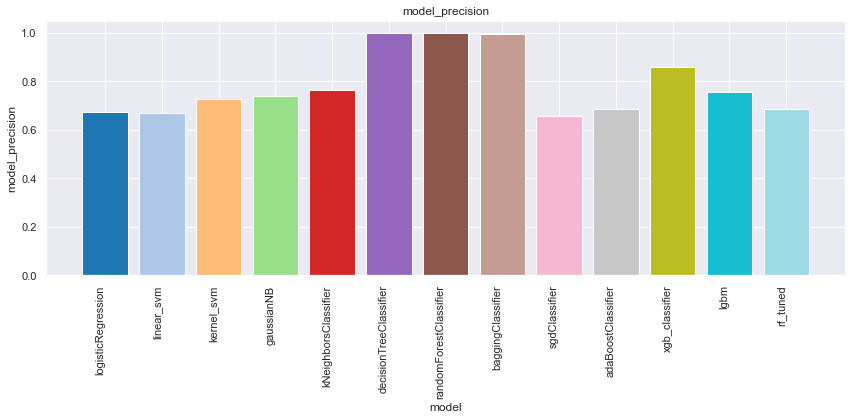

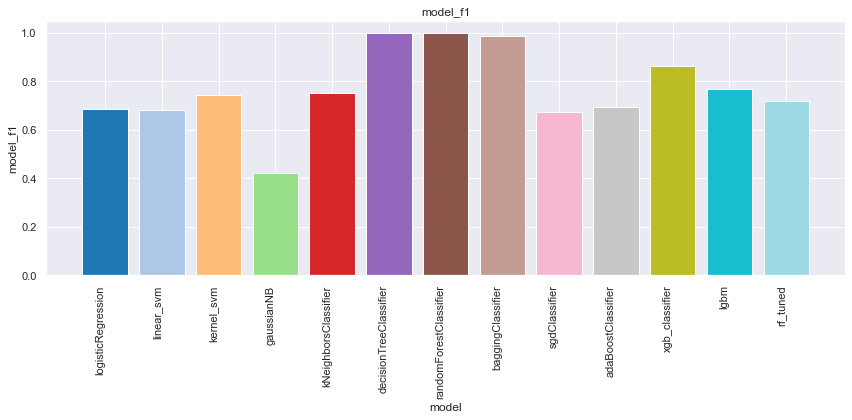

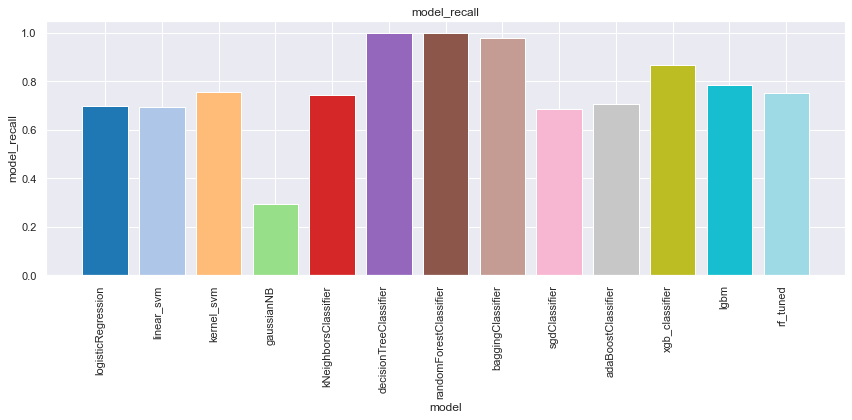

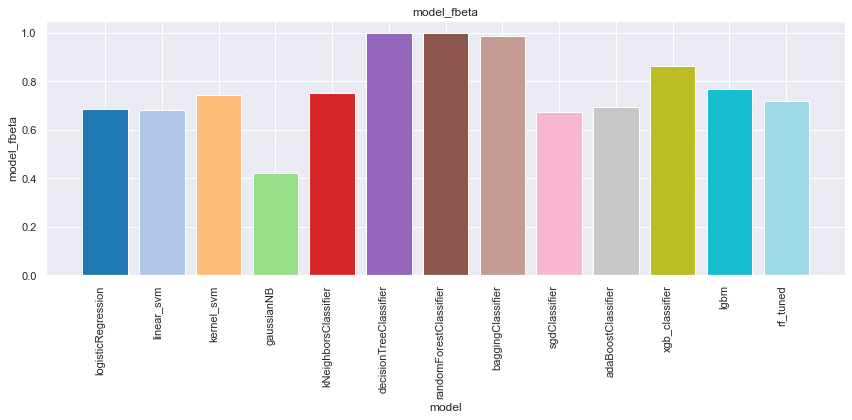

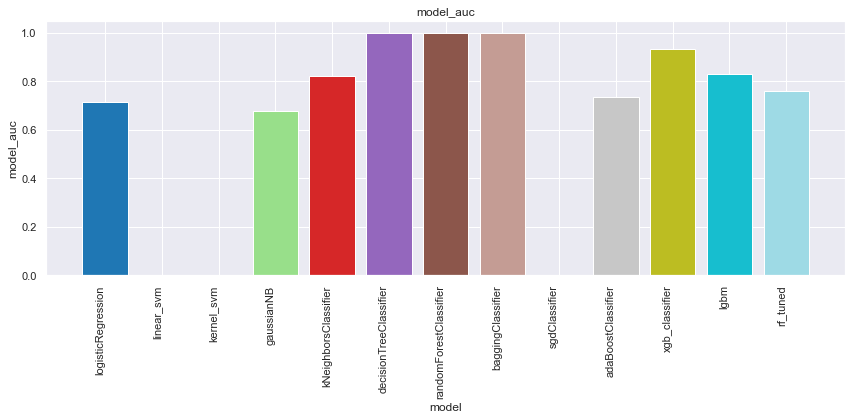

In [82]:
for i in range(1,len(eval_cols)):
    make_evaluation_plots(training_data_results,eval_cols[0],eval_cols[i])

# Bar plots to Compare Model performances vs different metrics over Testing Data

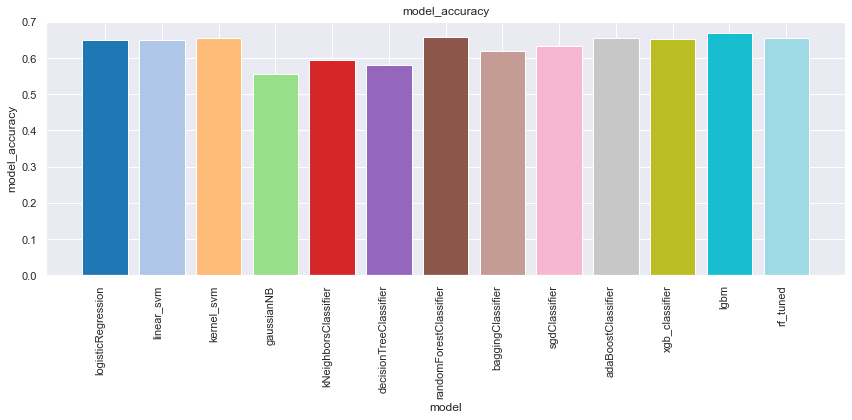

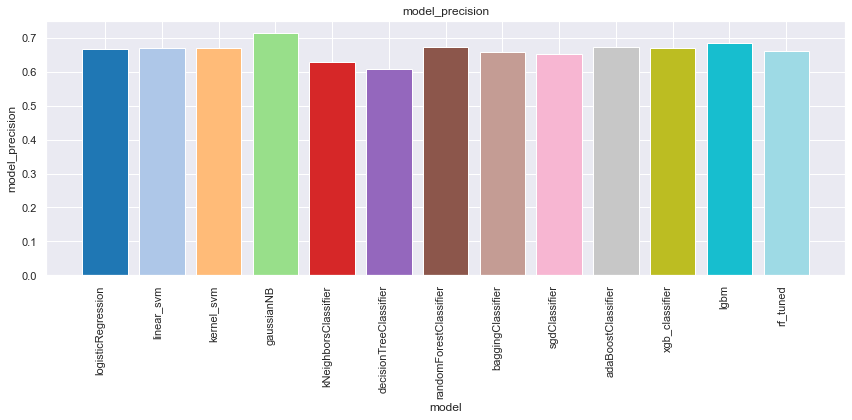

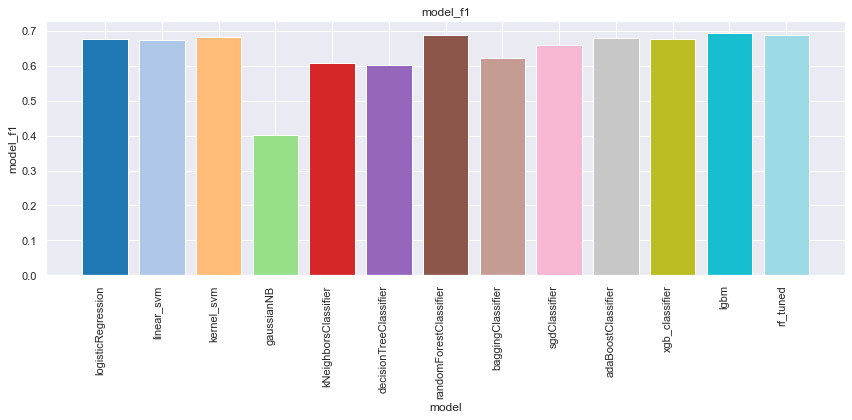

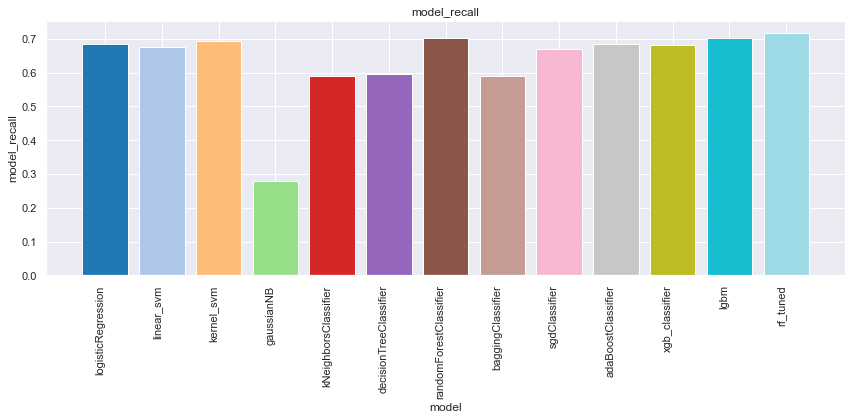

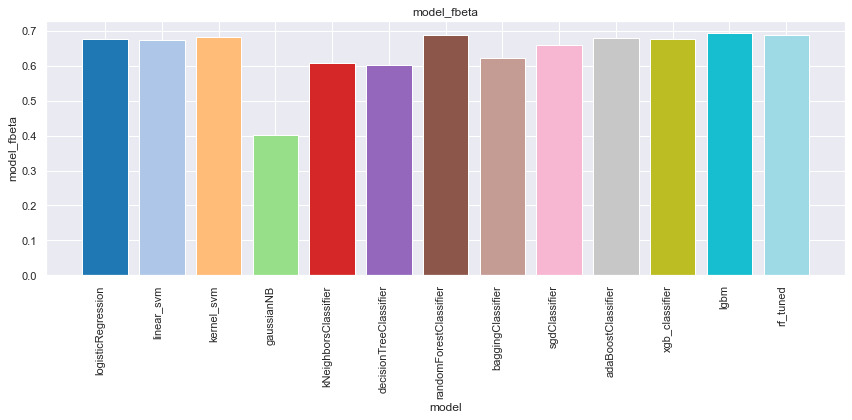

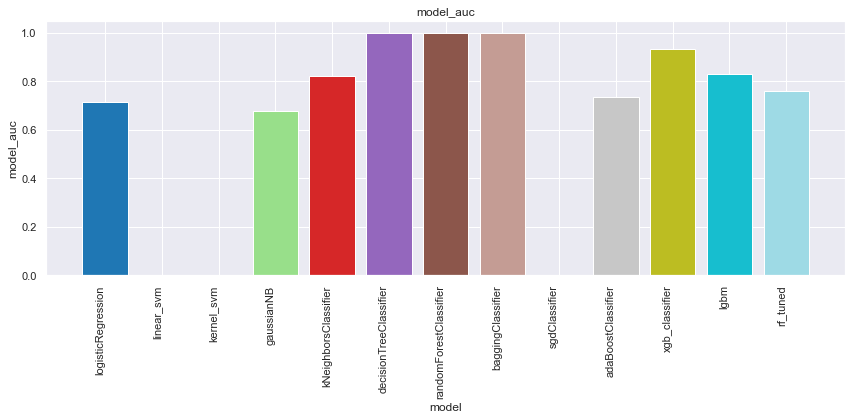

In [83]:
for i in range(1,len(eval_cols)):
    make_evaluation_plots(testing_data_results,eval_cols[0],eval_cols[i])

# Best values obtained from all the models combined

In [84]:
testing_data_results.describe().T['max']

model_accuracy     0.669570
model_precision    0.715000
model_f1           0.694251
model_recall       0.717980
model_fbeta        0.694251
model_auc          1.000000
Name: max, dtype: float64

In [85]:
highest_values = testing_data_results.iloc[:, 1:].max()

# Find the corresponding value in the 'Name' column using idxmax()
highest_names = testing_data_results.iloc[:, 1:].idxmax()
highest_names = [testing_data_results["model"][i] for i in highest_names]
# Create a new DataFrame to store the result

result_df = pd.DataFrame({'Name': highest_names, 'Best Value': highest_values})

result_df

,Name,Best Value
model_accuracy,lgbm,0.669570
model_precision,gaussianNB,0.715000
model_f1,lgbm,0.694251
model_recall,rf_tuned,0.717980
model_fbeta,lgbm,0.694251
model_auc,decisionTreeClassifier,1.000000


# BEST PERFORMER :

In [86]:
pd.DataFrame(testing_data_results.iloc[11,:]).T

,model,model_accuracy,model_precision,model_f1,model_recall,model_fbeta,model_auc
11,lgbm,0.66957,0.684698,0.694251,0.704074,0.694251,0.831839


# BEST PERFORMER STATS ON TESTING DATA:

In [87]:
print('Accuracy : '+str(lgbm_result['acc_test']))
print("Classification Report : ")
print(lgbm_result['classification_report_test'])

Accuracy : 0.6695697387235149
Classification Report : 
              precision    recall  f1-score   support

           0       0.65      0.63      0.64      3594
           1       0.68      0.70      0.69      4099

    accuracy                           0.67      7693
   macro avg       0.67      0.67      0.67      7693
weighted avg       0.67      0.67      0.67      7693

